In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

## Task 1

In [2]:
url = "https://ies-midterm.soulution.rocks/saveme"

In [3]:
r = requests.post(
        url,
        json = {"cuni":"41972591"})

In [4]:
r.status_code

200

In [5]:
r.text

'{"data": {}, "message": "DO NOT SHARE THE DATASET WITH ANYONE! Download manually the following file which contains the data: https://ies-python-midterm.s3.eu-central-1.amazonaws.com/sos.zip"}'

## Task 2

In [6]:
evr = pd.read_csv("EVR.csv", index_col='Date')

In [7]:
evr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,70.110001,74.230003,69.980003,73.839996,69.908577,725100
2019-01-03,73.379997,75.589996,72.930000,73.669998,69.747620,790200
2019-01-04,74.800003,76.860001,74.599998,76.440002,72.370148,607900
2019-01-07,74.449997,76.260002,73.150002,75.010002,71.016281,783700
2019-01-08,76.500000,77.589996,74.889999,77.150002,73.042351,771300


In [8]:
evr["company"] = "EVR"

In [9]:
evr

,Open,High,Low,Close,Adj Close,Volume,company
Date,,,,,,,
2019-01-02,70.110001,74.230003,69.980003,73.839996,69.908577,725100,EVR
2019-01-03,73.379997,75.589996,72.930000,73.669998,69.747620,790200,EVR
2019-01-04,74.800003,76.860001,74.599998,76.440002,72.370148,607900,EVR
2019-01-07,74.449997,76.260002,73.150002,75.010002,71.016281,783700,EVR
2019-01-08,76.500000,77.589996,74.889999,77.150002,73.042351,771300,EVR
...,...,...,...,...,...,...,...
2020-11-16,89.290001,89.610001,86.919998,88.690002,88.690002,370900,EVR
2020-11-17,87.879997,89.550003,87.570000,88.839996,88.839996,309400,EVR
2020-11-18,89.180000,90.690002,88.279999,88.309998,88.309998,334200,EVR


In [10]:
fltr = pd.read_csv("FLTR.csv", index_col='Date')
fltr

In [12]:
fltr["company"] = "FLTR"

In [13]:
companies = [evr, fltr]

In [14]:
df = pd.concat(companies)
df

,Open,High,Low,Close,Adj Close,Volume,company
Date,,,,,,,
2019-01-02,70.110001,74.230003,69.980003,73.839996,69.908577,725100,EVR
2019-01-03,73.379997,75.589996,72.930000,73.669998,69.747620,790200,EVR
2019-01-04,74.800003,76.860001,74.599998,76.440002,72.370148,607900,EVR
2019-01-07,74.449997,76.260002,73.150002,75.010002,71.016281,783700,EVR
2019-01-08,76.500000,77.589996,74.889999,77.150002,73.042351,771300,EVR
...,...,...,...,...,...,...,...
2020-11-16,25.240000,25.250000,25.230000,25.240000,25.240000,206700,FLTR
2020-11-17,25.230000,25.270000,25.230000,25.270000,25.270000,434900,FLTR
2020-11-18,25.250000,25.270000,25.240000,25.270000,25.270000,473100,FLTR


In [33]:
#check the dates
print(df.index.min() == '2019-01-02')
print(df.index.max() == '2020-11-20')

True
True


In [17]:
#min and max adj close per company
df.groupby('company').agg({'Adj Close':['min', 'max']})

Adj Close           
               min        max
company                      
EVR      35.080837  93.306076
FLTR     20.667774  25.280001

In [35]:
#which day was the highest volume
idx = df.groupby(['company'])['Volume'].transform(max) == df['Volume']
df[idx]

,Open,High,Low,Close,Adj Close,Volume,company
Date,,,,,,,
2019-01-30,93.050003,93.50,87.50,90.68,85.851967,2047600,EVR
2020-03-19,21.080000,22.09,19.42,21.65,21.440214,1891500,FLTR


Date
2019-01-02    False
2019-01-03    False
2019-01-04    False
2019-01-07    False
2019-01-08    False
              ...  
2020-11-16    False
2020-11-17    False
2020-11-18    False
2020-11-19    False
2020-11-20    False
Name: Volume, Length: 956, dtype: bool

In [39]:
#total shares
df.groupby(['company'])['Volume'].sum()

company
EVR     237506800
FLTR     64384100
Name: Volume, dtype: int64

In [44]:
df['company' == 'EVR'] = pd.Series(list(range(len(df))))

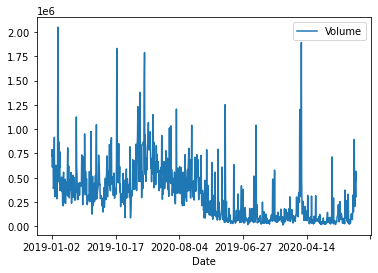

In [46]:
df.plot(y = "Volume");